In [1]:
#pip install wordcloud

In [2]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from nltk.tokenize import word_tokenize, WhitespaceTokenizer
import nltk
import os
import pandas as pd
import string
#nltk.download('stopwords')

In [3]:
def concatenar_csv(diretorio):
    frames = []

    for arquivo in os.listdir(diretorio):
        if arquivo.endswith('.csv'):
            caminho_arquivo = os.path.join(diretorio, arquivo)
            
            # Lendo o conteúdo do arquivo como uma única string
            with open(caminho_arquivo, 'r') as f:
                conteudo = f.read()
            
            # Criando um DataFrame com o conteúdo como uma única linha
            df = pd.DataFrame([conteudo], columns=['conteudo'])
            frames.append(df)

    projetos_concatenados = pd.concat(frames, ignore_index=True)

    return projetos_concatenados

In [4]:
projetos = concatenar_csv("projetos_lei_2012_2023")

In [5]:
#projetos['conteudo'].unique()

In [6]:
texto_projetos = " ".join(projetos['conteudo'])

In [7]:
#texto_projetos

In [8]:
stopwords = set(nltk.corpus.stopwords.words('portuguese'))
palavras_adicionais = ["sobre", "pl", "dezembro", "junho", "setembro", "câmara", "deputados", "lei", "nº", "art", "julho", "maio", "dá", "outras", "janeiro", "altera",
                      "novembro", "agosto", "providências", "1º", "dispõe", 'nacional','federal']
stopwords.update(palavras_adicionais)

In [9]:
texto_limpo = []
token_space = WhitespaceTokenizer()
word_tokens = token_space.tokenize(texto_projetos.lower())  # Tokenizando e convertendo para minúsculas

words_processed = []

for word in word_tokens:
    # Removendo a pontuação
    word = word.translate(str.maketrans('', '', string.punctuation))
    
    if word and word not in stopwords:  # Verificando se a palavra não está vazia e não é uma stopword
        words_processed.append(word)

texto_limpo.append(" ".join(words_processed))

In [10]:
#texto_limpo

In [11]:
texto_limpo = " ".join(texto_limpo)

In [12]:
with open("texto_projetos_limpo.txt", "w", encoding="utf-8") as file:
    file.write(texto_limpo[0])

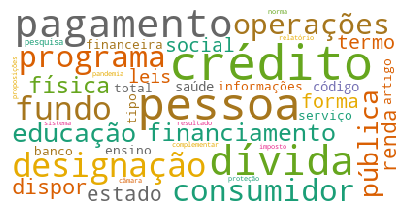

In [13]:
wordcloud = WordCloud(
    background_color="white",
    max_font_size=50,
    max_words=300,
    collocations=False,
    colormap="Dark2",
    random_state = 99
).generate(texto_limpo)


plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation="nearest")
plt.axis("off")
plt.savefig("nome_do_arquivo.svg", format="svg", dpi=500, bbox_inches="tight")
plt.show()